# Data Analytics - Lab 6
Student Name (s): Confidence Ahuekwe Student Number: 991714953 Date 16th-Nov.-2023.

In [51]:

# Import NumPy for numerical computing
import numpy as np

# Import Pandas for data manipulation
import pandas as pd

# Import SciPy for scientific computing
import scipy as sp

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import seaborn
import seaborn as sns
sns.set_style("darkgrid")

from scipy.stats import shapiro

# Import csv for reading comma-separated values files
import csv


In [52]:
# Load the CSV file into a DataFrame object and show the firstfive rows in a table form 
cars_df = pd.read_csv("cars.csv") # Pandas function that reads the csv file into a dataframe nmaed cars_df

cars_df.head() # Confirms that the dataset has beeen loaded successfully by printing the first five rows of the dataframe

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [53]:
# Print the last five rows of the DataFrame
cars_df.tail()

,User ID,Gender,Age,AnnualSalary,Purchased
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1
999,687,Female,44,73500,0


In [54]:
# Generating information about the dataset
cars_df.info

<bound method DataFrame.info of      User ID  Gender  Age  AnnualSalary  Purchased
0        385    Male   35         20000          0
1        681    Male   40         43500          0
2        353    Male   49         74000          0
3        895    Male   40        107500          1
4        661    Male   25         79000          0
..       ...     ...  ...           ...        ...
995      863    Male   38         59000          0
996      800  Female   47         23500          0
997      407  Female   28        138500          1
998      299  Female   48        134000          1
999      687  Female   44         73500          0

[1000 rows x 5 columns]>

In [55]:
# Datatypes of the various columns
cars_df.dtypes

User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object

In [56]:
# Finding dimensions of the data:
cars_df.shape

(1000, 5)

In [57]:
# Determining the summary statistics of the dataset
cars_df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [58]:
# listing the columns for easier copy-and-paste in subsequent references to any of the columns
cars_df.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

## Question No.2:

In [59]:
# Checking for any missing values or outliers
cars_df.isna()

,User ID,Gender,Age,AnnualSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,False,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [60]:
# Checking for any missing values or outliers
cars_df.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

## Question No.3:

In [61]:
# Checking for any duplication in the provided data.
cars_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [62]:
# Checking for any duplication in the provided data.
cars_df.duplicated().sum()

0

## Question No.4:

In [63]:
# Dropping the user id column.
cars_df = cars_df.drop('User ID', axis=1)

NOTE: This code removes the ‘User ID’ column from the DataFrame df. The axis=1 parameter specifies that we want to drop a column, and inplace=True ensures that the DataFrame is modified in place.

In [65]:
# Checking to be sure that the "User ID" column has been dropped
cars_df.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


## Question No.5:

In [66]:
# Determining the numerical statistics of the dataset
cars_df.describe 

<bound method NDFrame.describe of      Gender  Age  AnnualSalary  Purchased
0      Male   35         20000          0
1      Male   40         43500          0
2      Male   49         74000          0
3      Male   40        107500          1
4      Male   25         79000          0
..      ...  ...           ...        ...
995    Male   38         59000          0
996  Female   47         23500          0
997  Female   28        138500          1
998  Female   48        134000          1
999  Female   44         73500          0

[1000 rows x 4 columns]>

## Question No.6:

In [70]:
# Determining How many cars were purchased based on gender.
cars_df['Gender'].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

In [71]:
cars_df['Purchased'].value_counts()

0    598
1    402
Name: Purchased, dtype: int64

In [72]:
cars_df[['Gender', 'Purchased']].value_counts()

Gender  Purchased
Male    0            301
Female  0            297
        1            219
Male    1            183
dtype: int64

NOTE: The above output shows that 219 Females purchased a car each while 297 Female did not purchase any vehicle. On the otherhand out of 484 persons that identified as Male, only 183 persons purchased a car whereas 301 persons didn't purchase any car at all. Total number of persons that purchased a car including Male and Female is 402.

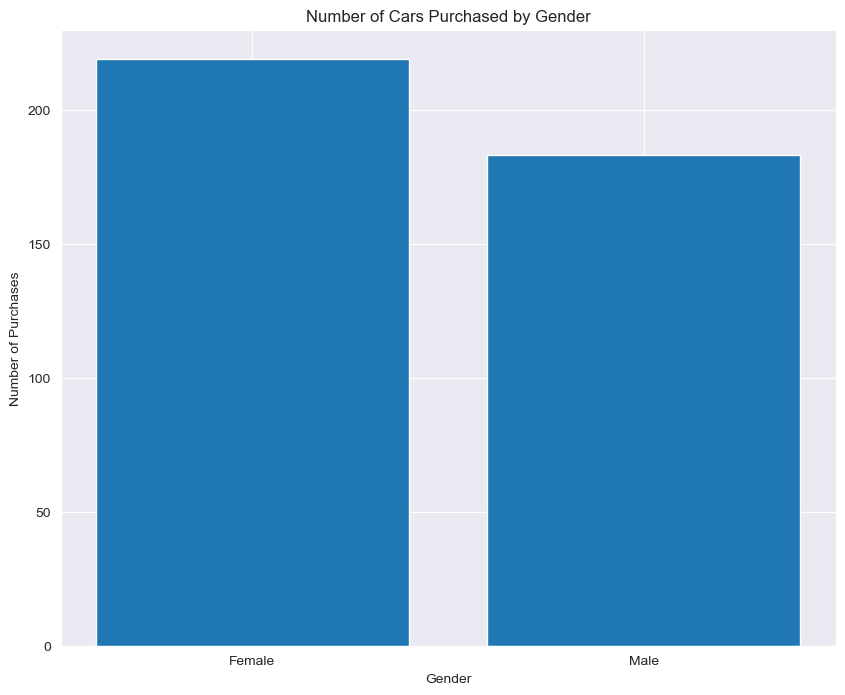

In [79]:
# Plotting the results for How many cars purchased based on gender
gender_counts = cars_df.groupby('Gender')['Purchased'].sum()

# Create a bar plot of the results
plt.figure(figsize=(10, 8))
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Number of Cars Purchased by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.show()

## Question No.7:

In [95]:
# Finding whether the female customers earn more than the male ones or not.
# Split the data into male and female groups
male_earnings = cars_df[cars_df['Gender'] == 'Male']['AnnualSalary']
female_earnings = cars_df[cars_df['Gender'] == 'Female']['AnnualSalary']

print(f"Male Customers' Total earnings: {male_earnings.sum()}.")
print(f"Female Customers' Total earnings: {female_earnings.sum()}.")

Male Customers' Total earnings: 34091000.
Female Customers' Total earnings: 38598000.


NOTE: The output of the code above shows that the Female Customers' total earnings is more than that of the male customers. 

<function matplotlib.pyplot.show(close=None, block=None)>

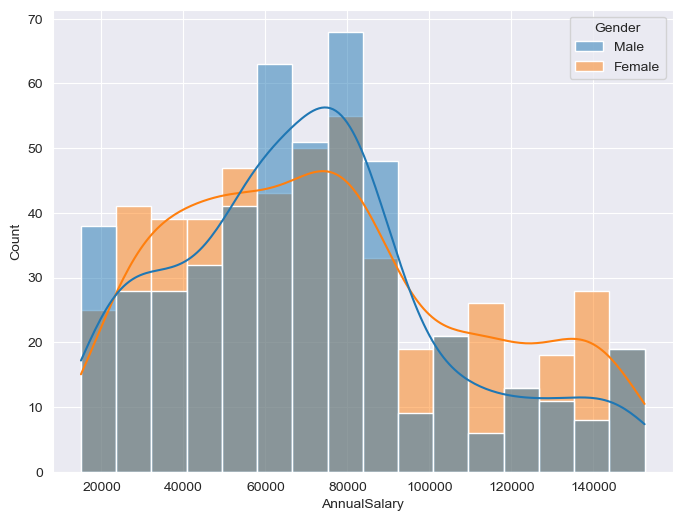

In [102]:
# Plotting and interpreting the results
plt.figure(figsize=(8, 6))
sns.histplot(x='AnnualSalary', hue='Gender', data=cars_df, kde=True) # draws a univariate or bivariate distribution of observations using Seaborn
plt.show

NOTE: The above is a visual representation of the male vs female earnings. The histogram shows that though the male dominated between the Annual salary range of 60,000 and 80,000, however the female customers' total earnings is higher because they significantly dominated the chart below the 60,000 annual range and from 100,000 and above.

## Question No.8:

In [103]:
# Finfing which gender is older based on the age column
# Group the data by gender and calculate the mean age for each group
gender_means = cars_df.groupby('Gender')['Age'].mean()

# Print the results
print(gender_means)
if gender_means['Male'] > gender_means['Female']:
    print('Males are older than females on average.')
elif gender_means['Male'] < gender_means['Female']:
    print('Females are older than males on average.')
else:
    print('The average ages of males and females are the same.')

Gender
Female    40.984496
Male      39.169421
Name: Age, dtype: float64
Females are older than males on average.


<Axes: xlabel='Age', ylabel='Count'>

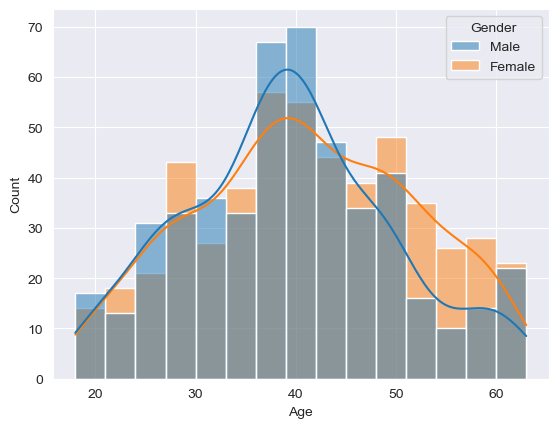

In [99]:
# Visual representation of which gender is older based on the age column
sns.histplot(x='Age', hue='Gender', data=cars_df, kde=True)

NOTE: From the above code and visualization is evident that the female customers are older than the male on average.

## Question No.9:

In [104]:
# Finding the correlation between the age and purchase. What do you conclude?
# Calculate the correlation between age and purchase
corr = cars_df['Age'].corr(cars_df['Purchased'])

# Print the correlation coefficient
print('The correlation coefficient between age and purchase is:', corr)

The correlation coefficient between age and purchase is: 0.6160363973749046


NOTE: The correlation coefficient is a value between -1 and 1 that indicates the strength and direction of the linear relationship between two variables. The correlation coefficient of 0.6160 above indicates a positive relationship, meaning that the purchase tends to increase as age increases.

<Axes: xlabel='Age', ylabel='Count'>

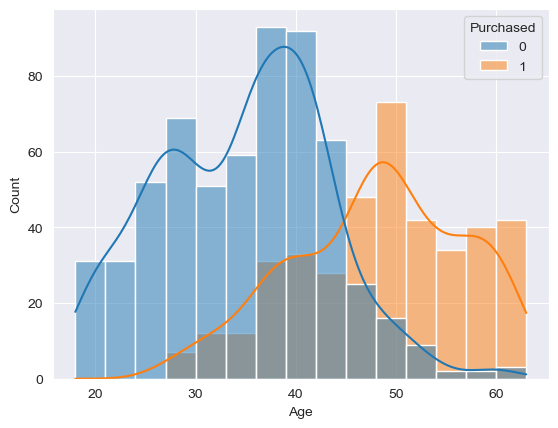

In [105]:
# Plotting the histogram
sns.histplot(x='Age', hue='Purchased', data=cars_df, kde=True)

NOTE: From the visualization above, we can conclude that it was only customers from 50years and above that purchased a car.

## Question No.10:

In [107]:
# Analysing the provided dataset to show that who earns more is likely to buy
# Calculate the correlation between earnings and purchase
corr = cars_df['AnnualSalary'].corr(cars_df['Purchased'])

# Print the correlation coefficient
print('The correlation coefficient between earnings and purchase is:', corr)

The correlation coefficient between earnings and purchase is: 0.36497443128283374


<Axes: xlabel='AnnualSalary', ylabel='Count'>

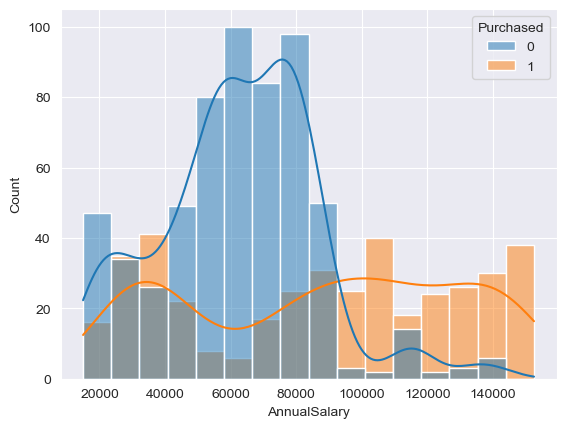

In [108]:
# Plotting the histogram
sns.histplot(x='AnnualSalary', hue='Purchased', data=cars_df, kde=True)

NOTE: The visualization above shows that customers who earn more are more likely to buy a car.

In [109]:
# Correlation relationship with Purchased column
cars_df.corr()['Purchased'].sort_values()

C:\Users\user\AppData\Local\Temp\ipykernel_9960\2641518194.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars_df.corr()['Purchased'].sort_values()


AnnualSalary    0.364974
Age             0.616036
Purchased       1.000000
Name: Purchased, dtype: float64

NOTE: From the above analysis, we can conlude that the Age (0.616036) is more related with Purchased than AnnualSalary (0.364974).